# <center><h1 style="color:Blue;"> **PROJECT DEEP LEARNING** </h1></center>

**Lecturer** : Pr Arnaud Zinflou

**Student** : Sandra Marion Kam Tsemo

## <center> **PROJECT 1 : Boston house price prediction** </center>

<center> Topic : The objective of this project is to predict house prices. Your notebook will contain:

*Importing and data processing*

*Model training*

*Validation*  
<center>

**Import  Libraries** 

In [1]:
import tensorflow as tf
from tensorflow import keras
import numpy as np
import pandas as pd
from sklearn.datasets import load_boston
import matplotlib.pyplot as plt
%matplotlib inline

**Load the boston_housing data**

In [3]:
boston_housing = keras.datasets.boston_housing
(train_data, train_labels), (test_data, test_labels) = boston_housing.load_data()

In [4]:
print(f'Training data : {train_data.shape}')
print(f'Test data : {test_data.shape}')
print(f'Training sample : {train_data[0]}')
print(f'Training target sample : {train_labels[0]}')

Training data : (404, 13)
Test data : (102, 13)
Training sample : [  1.23247   0.        8.14      0.        0.538     6.142    91.7
   3.9769    4.      307.       21.      396.9      18.72   ]
Training target sample : 15.2



**Normalization of  data set**

In [5]:
mean=train_data.mean(axis=0)
train_data=train_data-mean
std=train_data.std(axis=0)
train_data=train_data/std

test_data=test_data-mean
test_data=test_data/std

In [6]:
train_data

array([[-0.27224633, -0.48361547, -0.43576161, ...,  1.14850044,
         0.44807713,  0.8252202 ],
       [-0.40342651,  2.99178419, -1.33391162, ..., -1.71818909,
         0.43190599, -1.32920239],
       [ 0.1249402 , -0.48361547,  1.0283258 , ...,  0.78447637,
         0.22061726, -1.30850006],
       ...,
       [-0.40202987,  0.99079651, -0.7415148 , ..., -0.71712291,
         0.07943894, -0.67776904],
       [-0.17292018, -0.48361547,  1.24588095, ..., -1.71818909,
        -0.98764362,  0.42083466],
       [-0.40422614,  2.04394792, -1.20161456, ..., -1.30866202,
         0.23317118, -1.15392266]])

In [7]:
test_data

array([[ 1.55369355, -0.48361547,  1.0283258 , ...,  0.78447637,
        -3.48459553,  2.25092074],
       [-0.39242675, -0.48361547, -0.16087773, ..., -0.30759583,
         0.42733126,  0.47880119],
       [-0.39982927, -0.48361547, -0.86940196, ...,  0.78447637,
         0.44807713, -0.41415936],
       ...,
       [-0.20709507, -0.48361547,  1.24588095, ..., -1.71818909,
         0.37051949, -1.49344089],
       [-0.36698601, -0.48361547, -0.72093526, ..., -0.48960787,
         0.39275481, -0.41829982],
       [-0.0889679 , -0.48361547,  1.24588095, ..., -1.71818909,
        -1.21946544, -0.40449827]])

**Build the model**

Here we configure the layers of the model, then compile the model. First  few layers  are stack together using keras.Sequential. Next we configure the loss function, optimizer, and metrics to monitor which  are added during the model's compile step:

    Loss function - measures how accurate the model is during training, we want to minimize this with the optimizer.
    Optimizer - how the model is updated based on the data it sees and its loss function.
    Metrics - used to monitor the training and testing steps.

Let's build a network with 1 hidden layer of 45 neurons, and use mean squared error (MSE) as the loss function (most common one for regression problems)

In [10]:
#from operator import add
# create keras model and add the layers
model = keras.Sequential()
model.add(tf.keras.layers.Dense(45, activation='relu', input_dim = train_data.shape[1]))
model.add(tf.keras.layers.Dense(45, activation='relu'))
model.add(tf.keras.layers.Dense(1))
# compile the model
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=1e-1),loss='mse',metrics=['mae','mse'])
      


**Train Model**

To start training, 
we call the model.fit method the model is *fit* to the training data:

In [11]:
history= model.fit(train_data, train_labels, validation_split=0.2,
          batch_size=102,epochs=200)
model.summary()


Epoch 1/200
4/4 [==============================] - 1s 67ms/step - loss: 318.4698 - mae: 15.1498 - mse: 318.4698 - val_loss: 45.2720 - val_mae: 5.4609 - val_mse: 45.2720
Epoch 2/200
4/4 [==============================] - 0s 10ms/step - loss: 53.5893 - mae: 5.4180 - mse: 53.5893 - val_loss: 34.2307 - val_mae: 4.4009 - val_mse: 34.2307
Epoch 3/200
4/4 [==============================] - 0s 10ms/step - loss: 31.6206 - mae: 4.3446 - mse: 31.6206 - val_loss: 37.5679 - val_mae: 4.6395 - val_mse: 37.5679
Epoch 4/200
4/4 [==============================] - 0s 10ms/step - loss: 28.7223 - mae: 4.1759 - mse: 28.7223 - val_loss: 32.1516 - val_mae: 4.1053 - val_mse: 32.1516
Epoch 5/200
4/4 [==============================] - 0s 10ms/step - loss: 18.8526 - mae: 3.3052 - mse: 18.8526 - val_loss: 20.9644 - val_mae: 3.4079 - val_mse: 20.9644
Epoch 6/200
4/4 [==============================] - 0s 9ms/step - loss: 23.7030 - mae: 3.3859 - mse: 23.7030 - val_loss: 29.3534 - val_mae: 4.2365 - val_mse: 29.3534
Ep

**Evaluation of the model**
      

In [13]:
score=model.evaluate(test_data,test_labels,verbose=1)
print("Test loss {}".format(score[0]))
print("Test mae {}".format(score[1]))
print("Test mse {}".format(score[2]))

4/4 [==============================] - 0s 3ms/step - loss: 22.5119 - mae: 2.8278 - mse: 22.5119
Test loss 22.511934280395508
Test mae 2.8277623653411865
Test mse 22.511934280395508


**Plot the loss function measure on the training and validation sets**

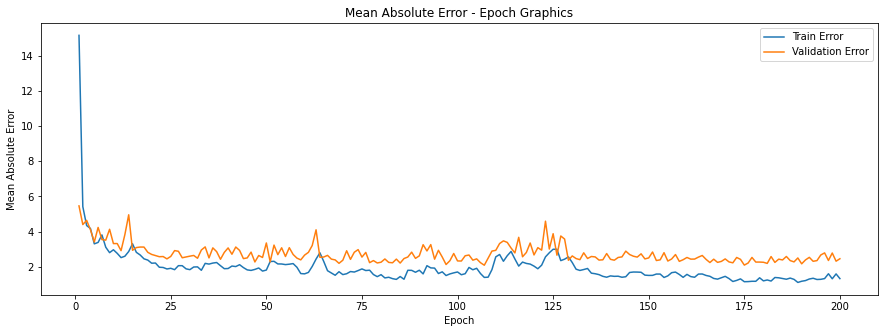

In [14]:
figure = plt.gcf()
figure.set_size_inches((15, 5))
plt.title('Mean Absolute Error - Epoch Graphics')
plt.xlabel('Epoch')
plt.ylabel('Mean Absolute Error')
plt.plot(range(1, len(history.history['mae']) + 1), history.history['mae'])
plt.plot(range(1, len(history.history['val_mae']) + 1), history.history['val_mae'])
plt.legend(['Train Error', 'Validation Error'])
plt.show()

**Observation** : Both the training and validation loss decrease in an exponential fashion as the number of epochs is increased,this shows that the model gains a high degree of accuracy as our epochs is increased.

In [18]:
# testing the model with using evaluate method
tess_loss = model.evaluate(test_data)
test_mae = model.evaluate(test_data)
#tess_loss,test_mae=model.evaluate(test_data,test_labels)

4/4 [==============================] - 0s 3ms/step - loss: 0.0000e+00 - mae: 0.0000e+00 - mse: 0.0000e+00


**Prediction**

In [20]:
data_predict = [1.26425925, -0.48522739, 1.0436589, -0.23112788, 1.37120745, -2.14308942, 1.13489104, -1.06802005, 1.71189006, 1.57042287, 0.77859951, 0.14769795, 2.7585581]
real_price= 10.7

data_predict = np.array(data_predict).reshape(1,13)
data_predict.shape

(1, 13)

In [22]:
predictions = model.predict(data_predict)

print("The predicted value is {}".format(predictions[0][0]))
print("The actual value is {}".format(real_price))

The predicted value is 10.471783638000488
The actual value is 10.7


The End !